In [1]:
import numpy as np
import matplotlib.pyplot as plt, matplotlib.colors as colors
from matplotlib.gridspec import GridSpec
import seaborn as sns
import pandas as pd
import constants, os, math
import Plotting as mf

In [ ]:
species=['CH3OH','#CH3OH']
tipo=constants.SHOCK
dfi=mf.buildDataframe(tipo, constants.folder, constants.physical, species, singleDf=True)
df=mf.localAbundanceDataframe(dfi, species, constants.physical, tipo, momento=constants.ALL, singleDf=True)
mf.singleBox(df, 'zeta', 'abundance', 'species', tipo, constants.folder.format(''), 'Abundance vs Cosmic Rays', saveFig=True, returnAx=False, figAx=None)

In [16]:
def localAbundanceDataframe(df, species, physical, tipo, momento=constants.FINAL, singleDf=True):
    if momento == constants.FINAL:
        dfFinal=df.loc[df['normalizedTime'] == 1]
    elif momento == constants.TMAX:
        dfFinal=df.loc[df['gasTemp'] == df.groupby('runName')['gasTemp'].transform('max')]
    elif momento == constants.SHOCKAVG:
        vals=['normalizedTime','Time']+physical[tipo]+species
        dfFinal=df.loc[df['gasTemp'] > 15].groupby(['runName']+constants.initparams[tipo],as_index=False)[vals].mean()
        for prop in vals:
            with np.errstate(divide='ignore'): dfFinal[f'{prop}_log']=np.log10(dfFinal[prop])
    elif momento == constants.ALL:
        dfFinal=df

    print(momento)
    campos=['runName','normalizedTime','normalizedTime_log','Time', 'Time_log']+[f'{prop}_log' for prop in physical[tipo]]+constants.initparams[tipo]+physical[tipo]
    if not singleDf: campos.append('tipo')

    if tipo==constants.SHOCK: campos=campos[:-1]

    tDic=dict([(key, []) for key in campos+['abundance','abundance_log', 'species']])
    for i in dfFinal.index:
        for spec in species:
            tDic['abundance'].append(dfFinal.at[i,spec]) 
            with np.errstate(divide='ignore'): tDic['abundance_log'].append(np.log10(dfFinal.at[i,spec]))
            tDic['species'].append(spec)
            for c in campos:
                tDic[c].append(dfFinal.at[i,c])
    
    print([(key, len(tDic[key])) for key in tDic])
    return pd.DataFrame(tDic)

In [17]:
species=['CH3OH','#CH3OH']
tipo=constants.SHOCK
dfi=mf.buildDataframe(tipo, constants.folder, constants.physical, species, singleDf=True)
df=localAbundanceDataframe(dfi, species, constants.physical, tipo, momento=constants.ALL, singleDf=True)

Full
[('runName', 19102), ('normalizedTime', 19102), ('normalizedTime_log', 19102), ('Time', 19102), ('Time_log', 19102), ('Density_log', 19102), ('gasTemp_log', 19102), ('av_log', 19102), ('zeta_log', 19102), ('radfield_log', 19102), ('shockVel_log', 19102), ('cosmicRay', 19102), ('interstellarRad', 19102), ('iDens', 19102), ('shockVel', 19102), ('Density', 19102), ('gasTemp', 19102), ('av', 19102), ('zeta', 19102), ('radfield', 19102), ('abundance', 19102), ('abundance_log', 19102), ('species', 19102)]


In [45]:
df=mf.buildDataframe(constants.SHOCK, constants.folder, constants.physical, constants.species, singleDf=True)
fDf=mf.localAbundanceDataframe(df, constants.species, constants.physical, constants.SHOCK, momento=constants.FINAL, singleDf=True)
tDf=mf.localAbundanceDataframe(df, constants.species, constants.physical, constants.SHOCK, momento=constants.TMAX, singleDf=True)
aDf=mf.localAbundanceDataframe(df, constants.species, constants.physical, constants.SHOCK, momento=constants.SHOCKAVG, singleDf=True)

In [84]:
llaves={constants.FINAL: fDf,constants.TMAX:tDf,constants.SHOCKAVG:aDf}
for llave in llaves:
    llaves[llave]['momento']=llave

dfFinal=pd.concat([fDf,tDf,aDf], ignore_index=True)

In [73]:
dfFinal=aDf.merge(fDf[['runName', 'species', 'abundance']], on=['runName', 'species'], suffixes=('', '_final'))
dfFinal=dfFinal.merge(tDf[['runName', 'species', 'abundance']], on=['runName', 'species'], suffixes=('', '_tmax'))

/var/tmp/gsampsonolalde/ipykernel_45958/2763812002.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(dfFinal['runName'], rotation = 90)


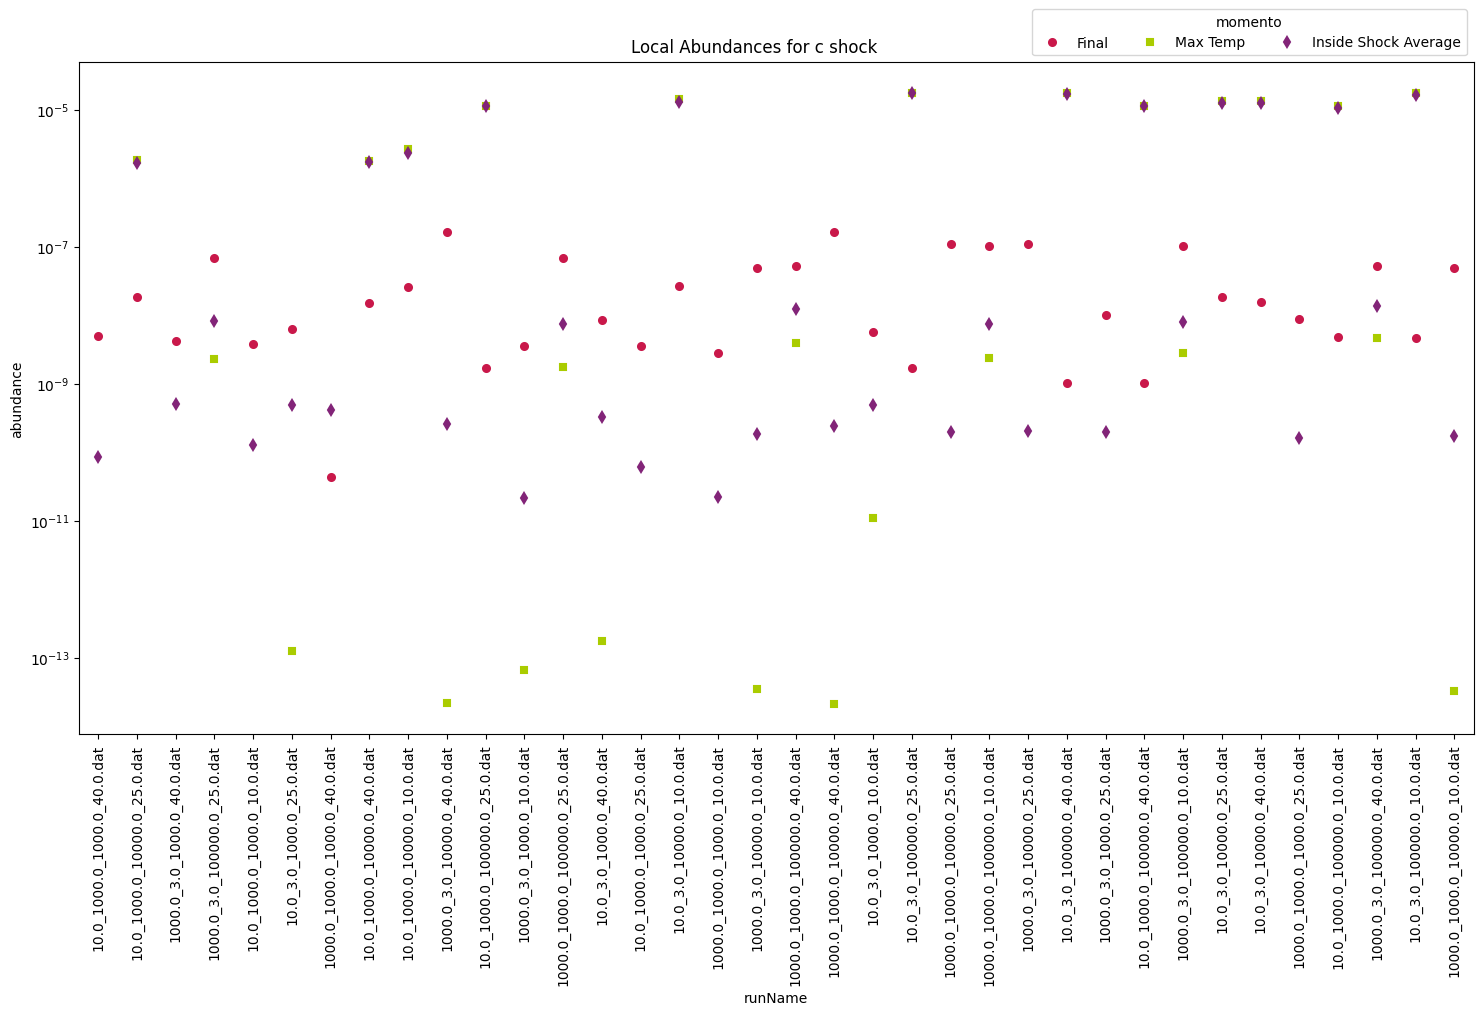

In [104]:
xbound=-6
saveFig=True
returnAx=False
figAx=None

xaxis='runName'
yaxis='abundance'
tipo=constants.SHOCK
nameBase=''
title='Local Abundances for '+tipo

fig, axi = plt.subplots(figsize=(18,8))
axs= figAx if returnAx else axi
fig.subplots_adjust(top=0.95)

sns.pointplot(dfFinal, x=xaxis, y=yaxis, errorbar=lambda x: (x.min(), x.max()), hue='momento', palette=['#c9184a', '#aacc00', '#822478'],
# sns.pointplot(dfFinal, x=xaxis, y=yaxis, errorbar=lambda y: (y['abundance_final'], y['abundance_tmax']),
              log_scale=True, markers=['o','s','d'],
              linestyle="none", capsize=.4, linewidth=2, ax=axs)
axs.set_xticklabels(dfFinal['runName'], rotation = 90)
sns.move_legend(axs, "lower right", bbox_to_anchor=(1, 1), ncol=3)

if xaxis == 'normalizedTime': axs.set_xbound(xbound,0.1)
# if yaxis in constants.species+['abundance']: axs.set_ybound(-14,-4)
constants.folder
fig.suptitle(title)
fig.savefig(constants.folder.format('localAbundace_Shock.png'), dpi=300, bbox_inches='tight')

# Box

Text(0.5, 0.98, 'titulo')

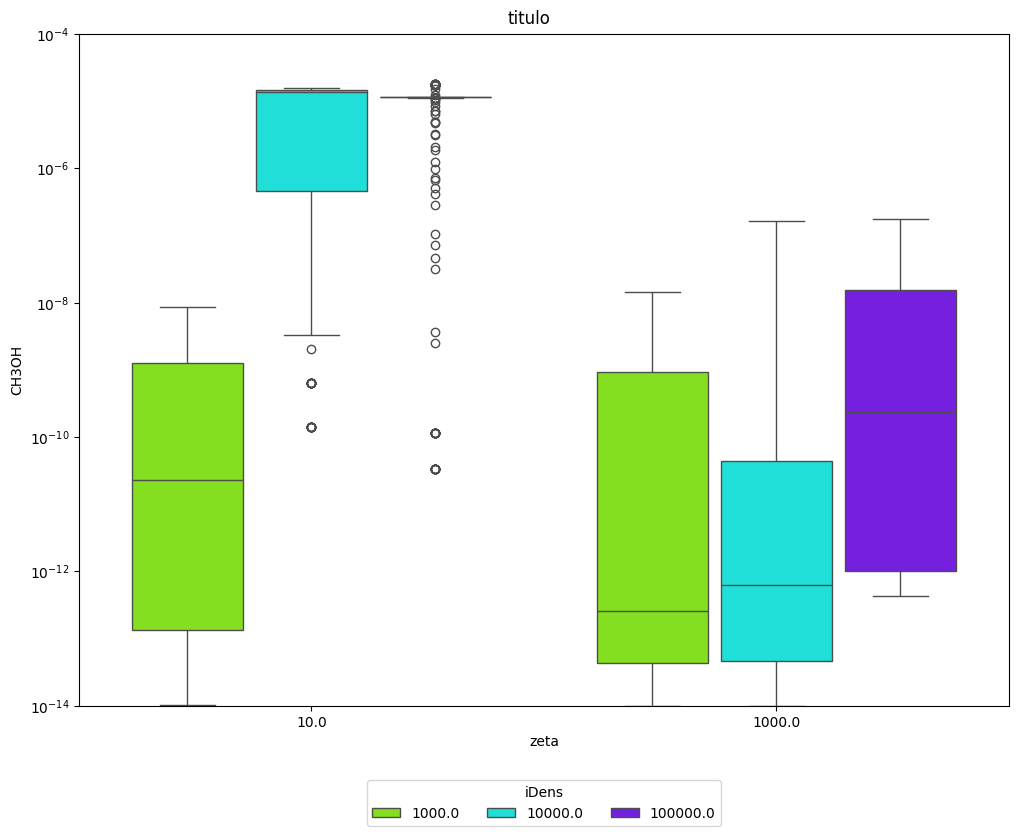

In [46]:
xaxis='zeta'
yaxis='CH3OH'
focus='iDens'
tipo=constants.SHOCK
nameBase=''
title='titulo'
xbound=-6
saveFig=True
returnAx=False
figAx=None

notLeg= False if focus else True
if notLeg: focus = xaxis

fig, axi = plt.subplots(figsize=(12,8))
axs= figAx if returnAx else axi
fig.subplots_adjust(top=0.95)
sns.boxplot(df, x=xaxis, y=yaxis,
            hue=focus, palette='hsv',
            legend=None if notLeg else 'auto',
            orient='v', gap=0.1,
            log_scale=True, ax=axs)

if yaxis in constants.species+['abundance']: axs.set_ybound(1e-14,1e-4)
if not notLeg: sns.move_legend(axs, "upper center", bbox_to_anchor=(0.5, -0.1), ncol=df[focus].nunique())

fig.suptitle(title)

# Scatter

In [76]:
def singleScatter(df, xaxis, yaxis, focus, tipo, nameBase, title,
                  xbound=-6, saveFig=True, returnAx=False, figAx=None):
    mf.checkFolders(nameBase)
    figName= '_'.join([nameBase,tipo.replace(' ','').upper(),xaxis,yaxis,focus])+'.png'

    contVar= focus in constants.varPhys[tipo]
    colorPalette=sns.blend_palette(['#2e82dc','#5d417b','#8c001a','#f2c32c'],as_cmap=True) if contVar else ['#72469b','#0fa4d2','#c2e000','#ca4c16','#c02321'][:df[focus].nunique()]
    norm = colors.LogNorm(df[focus].min(),df[focus].max())if contVar else None

    fig, axi = plt.subplots(figsize=(10 if contVar else 8,8))
    axs= figAx if returnAx else axi
    fig.subplots_adjust(top=0.95)
    sns.scatterplot(df, x=xaxis+'_log', y=yaxis+'_log',
                    hue=focus, palette=colorPalette, hue_norm=norm,
                    legend=None if contVar else 'auto',
                    linewidth=0, alpha=0.75, s=15, ax=axs)
    axs.minorticks_on()

    if xaxis == 'normalizedTime': axs.set_xbound(xbound,0.1)
    if yaxis in constants.species+['abundance']: axs.set_ybound(-14,-4)

    if contVar:
        sm = plt.cm.ScalarMappable(cmap=colorPalette, norm=norm)
        sm.set_array([])
        fig.colorbar(sm, ax=axs, label=focus)
    else:
        sns.move_legend(axs, "upper center", bbox_to_anchor=(0.5, -0.1), ncol=df[focus].nunique())

    fig.suptitle(title)
    if saveFig: fig.savefig(figName, dpi=300, bbox_inches='tight')
    plt.close()

In [ ]:
singleScatter(df, 'normalizedTime', 'CH3OH', 'zeta', constants.SHOCK, 'nameBase', 'title', xbound=-6, saveFig=False, returnAx=False, figAx=None)

In [98]:
def gridScatter(plotDict: dict, tipo, title, nameBase, xbound=-6, saveFig=True):
    # mf.checkFolders(nameBase)
    figName= '_'.join([nameBase,tipo.replace(' ','').upper()]+[row for row in plotDict])+'.png'

    cols, rows, focusList = (plotDict[row] for row in plotDict)
    nRow=len(rows)
    nCol=len(cols)

    fig, axs = plt.subplots(nRow, nCol, figsize=(8*nCol,6*nRow))
    fig.subplots_adjust(top=0.95, wspace=0.15, hspace=0.3)
    fig.suptitle(title, size='xx-large', y=1)

    for i in range(nRow):
        for j in range(nCol):
            ax=axs[i][j]
            singleScatter(df, cols[j], rows[i], focusList[j], tipo, nameBase, '', xbound=xbound, saveFig=False, returnAx=True, figAx=ax)
            ax.set_title(' | '.join([cols[j], rows[i], focusList[j]]))

    if saveFig: fig.savefig(figName, dpi=300, bbox_inches='tight')

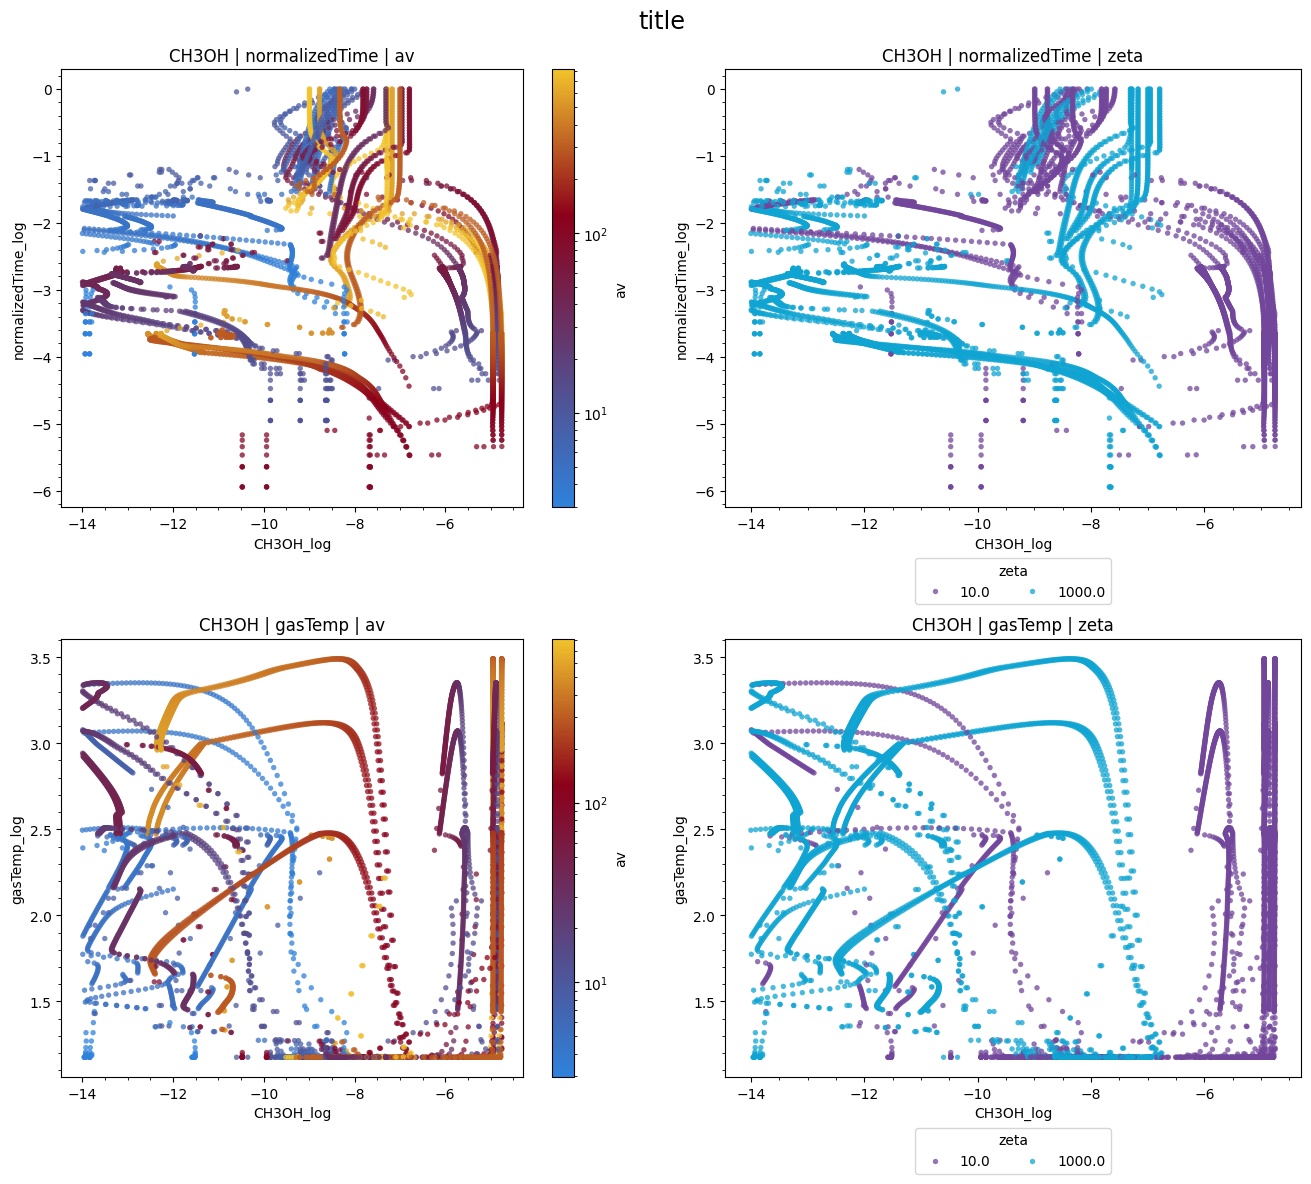

In [100]:
gridScatter({'CH3OH': ['CH3OH']*2, 'phtimys': ['normalizedTime', 'gasTemp'], 'phys': ['av', 'zeta']}, constants.SHOCK, 'title', 'nameBase', xbound=-6, saveFig=False)

Text(0.5, 0.98, 'C SHOCK')

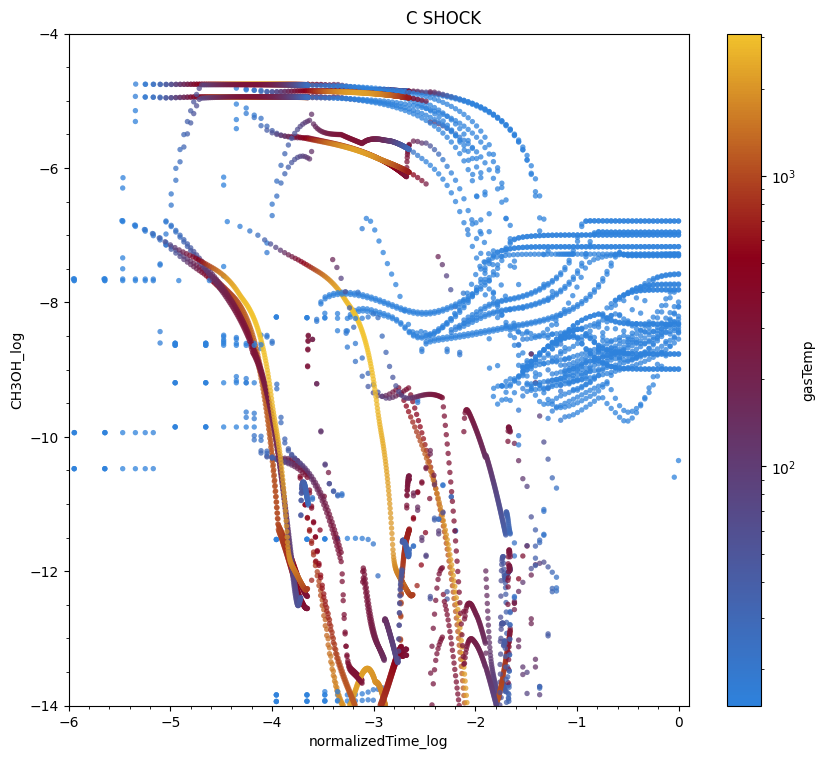

In [16]:
xaxis='normalizedTime'
yaxis='CH3OH'
focus='gasTemp'
tipo=constants.SHOCK
title=tipo.upper()

xbound=-6

contVar= focus in constants.varPhys[tipo]
colorPalette=sns.blend_palette(['#2e82dc','#5d417b','#8c001a','#f2c32c'],as_cmap=True) if contVar else ['#72469b','#0fa4d2','#c2e000','#ca4c16','#c02321']
norm = colors.LogNorm(df[focus].min(),df[focus].max())if contVar else None

fig, ax = plt.subplots(figsize=(10 if contVar else 8,8))
fig.subplots_adjust(top=0.95)
sns.scatterplot(df, x=xaxis+'_log', y=yaxis+'_log',
                hue=focus, palette=colorPalette, hue_norm=norm,
                legend=None if contVar else 'auto',
                linewidth=0, alpha=0.75, s=15, ax=ax)
ax.minorticks_on()

if xaxis == 'normalizedTime': ax.set_xbound(xbound,0.1)
if yaxis in constants.species+['abundance']: ax.set_ybound(-14,-4)

if contVar:
    sm = plt.cm.ScalarMappable(cmap=colorPalette, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, label=focus)
else:
    sns.move_legend(ax, "center left", bbox_to_anchor=(1, 0.5))

fig.suptitle(title)